In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-corpus/mental_health.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('/kaggle/input/mental-health-corpus/mental_health.csv')

df.head(20)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1
6,feel like someone needs hear tonight feeling r...,0
7,deserve liveif died right noone would carei re...,1
8,feels good ive set dateim killing friday nice ...,1
9,live guiltok made stupid random choice its ge...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


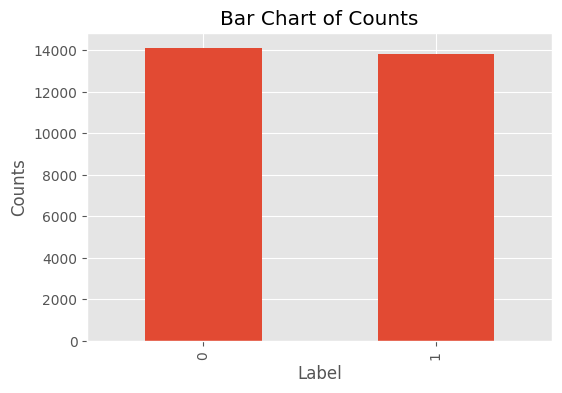

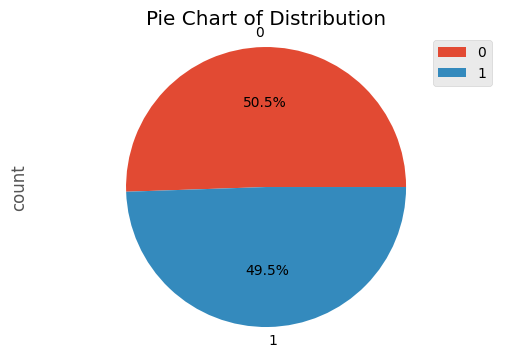

In [5]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'category' column
category_counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Bar Chart of Counts')
plt.show()
print()

# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Distribution')

# Add legend
plt.legend()

plt.show()

In [6]:
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 27977 data in this dataset
Number of Duplicates: 5
Number of Missing Values by column:
 text     0
label    0
dtype: int64
Number of Missing Values: 0


In [7]:
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 27977 data in this dataset
Number of Duplicates: 5
Number of Missing Values by column:
 text     0
label    0
dtype: int64
Number of Missing Values: 0


In [8]:
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)

top_5_duplicate_pairs

,text,label
15524,happy birthday everyone birthday st october ha...,0
24502,happy birthday everyone birthday st october ha...,0
16742,need help anyone good pythagriam tribometry h...,0
24970,need help anyone good pythagriam tribometry h...,0
1646,posting ara ara forget day ara ara,0
22603,posting ara ara forget day ara ara,0
11570,real suppleroot hours up day far,0
12573,real suppleroot hours up day far,0
22389,real suppleroot hours up day far,0


In [9]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


In [10]:
df.info

<bound method DataFrame.info of                                                     text  label
0      dear american teens question dutch person hear...      0
1      nothing look forward lifei dont many reasons k...      1
2      music recommendations im looking expand playli...      0
3      im done trying feel betterthe reason im still ...      1
4      worried  year old girl subject domestic physic...      1
...                                                  ...    ...
27972  posting everyday people stop caring  religion ...      0
27973  okay definetly need hear guys opinion ive pret...      0
27974  cant get dog think ill kill myselfthe last thi...      1
27975  whats point princess bridei really think like ...      1
27976  got nudes person might might know snapchat do ...      0

[27972 rows x 2 columns]>

In [11]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'Rating' and then apply the sample function to 'Review_Text' of each group
    samples = df.groupby('label')['text'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    # samples_df = samples.reset_index()
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 100 characters
samples = random_sample_reviews(df, num_samples=3)
samples.head(20)

,label,text
0,0,crush groped me little forewarning go somewhat depth touched friends told crush f m her friends along time hoping would pass off fast forward days walk biology class surprise sat class chose seat...
1,0,goddamn motherfucking damn im still person years think ill end for legal reasons thats joke prolly idk well see
2,0,mind readers dont tell anyone
3,1,s great job university degree goals future beautiful fiancee afraidi scared nothing die like point disappear end attached afraid without die paramedic see death sometimes hurts imagine loved ones ...
4,1,im feeling okim genuinely feeling little better today cause someone said help lot make happy first time ive told something like that anyone else love someone comes help like created supportive atm...
5,1,seeing thingsso lately ive daydream type things id looking glass water something id see smash head someone elses id backseat car id see us crashingor attacking random person id see store crazy oridk


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-06-13 04:11:20.669742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 04:11:20.669855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 04:11:20.802685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)


In [14]:
df['text1'] = (df['text']
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

In [15]:
df_comparison = pd.DataFrame()

# Original text and its length
df_comparison['pre-clean text'] = df['text']
df_comparison['pre-clean len'] = df['text'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comparison['post-clean text'] = df['text1']
df_comparison['post-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

df_comparison.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,20,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,20
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,64,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,64
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy no...,100,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy not...,100
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electro...,311,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electroni...,311
5,hey rredflag sure right place post this goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country were looki...,61,hey rredflag sure right place post this goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country were lookin...,61
6,feel like someone needs hear tonight feeling right think cant anything people keep puting listen this its your life everyone else living it someone tells unable something work get done say wrong s...,79,feel like someone needs hear tonight feeling right think cant anything people keep puting listen this its your life everyone else living it someone tells unable something work get done say wrong s...,79
7,deserve liveif died right noone would carei real friendsi always start conversations get dry responses i feel comfortable around females emotional abuse mom put left usi never find love i keep get...,51,deserve liveif died right noone would carei real friendsi always start conversations get dry responses i feel comfortable around females emotional abuse mom put left usi never find love i keep get...,51
8,feels good ive set dateim killing friday nice finally know im gonna it bye,14,feels good ive set dateim killing friday nice finally know im gonna it bye,14
9,live guiltok made stupid random choice its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty mu...,66,live guiltok made stupid random choice its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty muc...,66


In [16]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [17]:
df['text2'] = (df['text1'].apply(remove_stopwords))

In [18]:
df_comp = pd.DataFrame()

# Original text and its length
df_comp['pre-clean text'] = df['text1']
df_comp['pre-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comp['post-clean text'] = df['text2']
df_comp['post-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

df_comp.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,20,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang,19
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,64,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,61
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy not...,100,im done trying feel betterthe reason im still alive know mum devastated ever killed ever passes im still state im going hesitate ending life shortly im almost take meds go therapy nothing seems he...,96
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electroni...,311,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electroni...,296
5,hey rredflag sure right place post this goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country were lookin...,61,hey rredflag sure right place post goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country looking current ...,57
6,feel like someone needs hear tonight feeling right think cant anything people keep puting listen this its your life everyone else living it someone tells unable something work get done say wrong s...,79,feel like someone needs hear tonight feeling right think cant anything people keep puting listen life everyone else living someone tells unable something work get done say wrong someone says youl ...,69
7,deserve liveif died right noone would carei real friendsi always start conversations get dry responses i feel comfortable around females emotional abuse mom put left usi never find love i keep get...,51,deserve liveif died right noone carei real friendsi always start conversations get dry responses feel comfortable around females emotional abuse mom put left usi never find love keep getting remin...,47
8,feels good ive set dateim killing friday nice finally know im gonna it bye,14,feels good ive set dateim killing friday nice finally know im gonna bye,13
9,live guiltok made stupid random choice its getting me basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty muc...,66,live guiltok made stupid random choice getting basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoy...,62


In [19]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [20]:
df['text3'] = df['text2'].apply(lemmatize_text)

In [21]:
df_lemma = pd.DataFrame()

# Original text and its length
df_lemma['pre-clean text'] = df['text2']
df_lemma['pre-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_lemma['post-clean text'] = df['text3']
df_lemma['post-clean len'] = df['text3'].apply(lambda x: len(str(x).split()))

df_lemma.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,23,dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math,23
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang,19,nothing look forward lifei dont many reason keep going feel like nothing keep going next day make want hang,19
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhym...,61,music recommendation im looking expand playlist usual genre alt pop minnesota hip hop steampunk various indie genre artist people like cavetown aliceband bug hunter penelope scott various rhymesay...,61
3,im done trying feel betterthe reason im still alive know mum devastated ever killed ever passes im still state im going hesitate ending life shortly im almost take meds go therapy nothing seems he...,96,im done trying feel betterthe reason im still alive know mum devastated ever killed ever pass im still state im going hesitate ending life shortly im almost take med go therapy nothing seems help ...,97
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electroni...,296,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl year life uk live different country kept touch electronic ...,296
5,hey rredflag sure right place post goes im currently student intern sandia national labs working survey help improve marketing outreach efforts many schools recruit around country looking current ...,57,hey rredflag sure right place post go im currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country looking current under...,57
6,feel like someone needs hear tonight feeling right think cant anything people keep puting listen life everyone else living someone tells unable something work get done say wrong someone says youl ...,69,feel like someone need hear tonight feeling right think cant anything people keep puting listen life everyone else living someone tell unable something work get done say wrong someone say youl nev...,69
7,deserve liveif died right noone carei real friendsi always start conversations get dry responses feel comfortable around females emotional abuse mom put left usi never find love keep getting remin...,47,deserve liveif died right noone carei real friendsi always start conversation get dry response feel comfortable around female emotional abuse mom put left usi never find love keep getting reminded...,47
8,feels good ive set dateim killing friday nice finally know im gonna bye,13,feel good ive set dateim killing friday nice finally know im gon na bye,14
9,live guiltok made stupid random choice getting basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoy...,62,live guiltok made stupid random choice getting basically molested relative super erratic thing haunting right now random walk home randomly assaulted classmate screamed name loud pretty much annoy...,62


In [22]:
df['text_length'] = df['text3'].apply(lambda x: len(str(x).split()))

In [23]:
text_lengths = [len(text.split()) for text in df["text3"]]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of Text Lengths: {quartile_95}")

95th Quartile of Text Lengths: 231.0


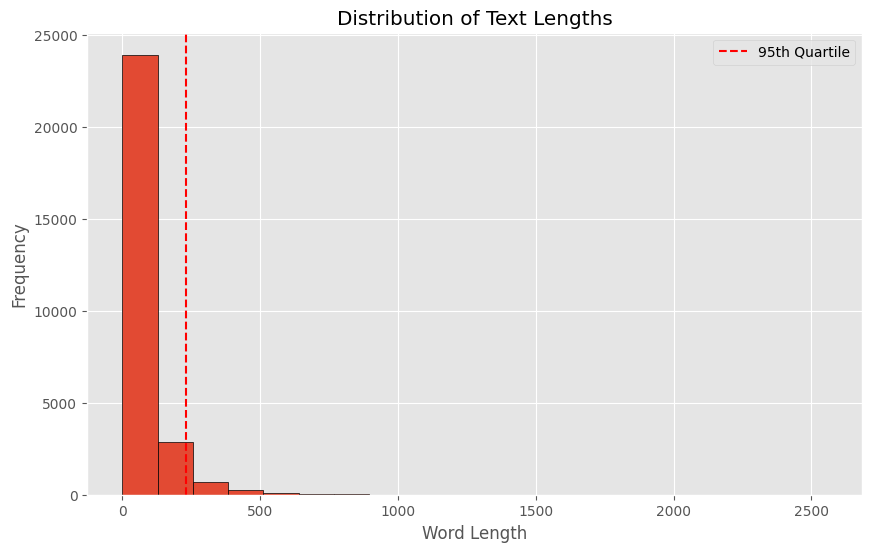

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [25]:
df.text_length.describe()

count    27972.000000
mean        68.121014
std         97.784015
min          0.000000
25%         15.000000
50%         36.000000
75%         82.000000
max       2556.000000
Name: text_length, dtype: float64

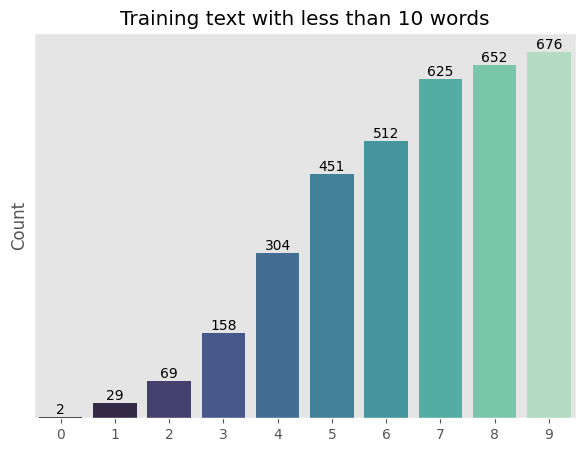

In [26]:
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')
plt.title('Training text with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [27]:
data_head=df[df['text_length']<2]
data_head.head(30)

,text,label,text1,text2,text3,text_length
654,sleep,0,sleep,sleep,sleep,1
1811,karent,0,karent,karent,karent,1
2781,male,0,male,male,male,1
3354,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,1,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,cthgisnialpnidenodnabamocefilretfalarutcetihcrasptth,1
3626,enoughhttpimgurcomhqermql,1,enoughhttpimgurcomhqermql,enoughhttpimgurcomhqermql,enoughhttpimgurcomhqermql,1
4094,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,1,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,whiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelyankeemikeechowhiskeyhotelya...,1
4578,name,1,name,name,name,1
4743,hello,1,hello,hello,hello,1
4837,something,0,something,something,something,1
6579,,0,,,,0


In [28]:
len(df)

27972

In [29]:
df = df[df['text_length'] >= 3]

In [30]:
len(df)

27872

In [31]:
df = df.drop(['text', 'text1', 'text2'], axis=1)

In [32]:
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head(30)

,label,text3,text_length
10110,0,video picture death video photo always death youll eventually die youll already taken video solved clickbait video video taken death thank later,22
16118,0,help help commenting post want orange mail pls,8
4336,1,anyone talk toi need someone talk situation,7
7496,1,tonightno shitty life bad circumstance no im lazy incompetent unsuccessful nothing happened beyond normal im done living want anymore ive downward spiral since im now shit together im well way ish...,147
7954,1,anyone feel like life force throati feel like everything life force upon im forced act way way im forced go school im forced work job passion im forced smile im forced cry im forced get married ki...,84
25377,0,anyone else absolutely hate situation mean getting scolded parent remaining calm trying explain everything time finally getting annoyed situation exact second turn theyre calm nowhere trying act l...,40
17739,0,anyone want silver idk whoever comment first ig,8
1762,1,destined failure tragedy mom dy im year old im beside dy pneumonia breast cancer chemo fail law school year debt age got pregnant gave birth month daughter dy hour alive cousin age gave birth heal...,132
21839,0,karma hit today cake make,5
26355,1,last year sold beautiful condominium foolish use mind time cat got sick one passed away one week later due move new vet killed got sick needed help given taken mental hospital police vet told poli...,69


In [33]:
df.label.value_counts()

label
0    14074
1    13798
Name: count, dtype: int64

In [34]:
data = {
    'Label': ["Non-mental-health", "Mental-health"],
    'Label Encoded': [0,1]
}

# Create DataFrame
dr = pd.DataFrame(data)

# Print DataFrame
dr

,Label,Label Encoded
0,Non-mental-health,0
1,Mental-health,1


In [35]:
class_names=dr.Label.to_list()
class_names

['Non-mental-health', 'Mental-health']

In [36]:
X = df['text3'].to_numpy()
y = df['label'].to_numpy()

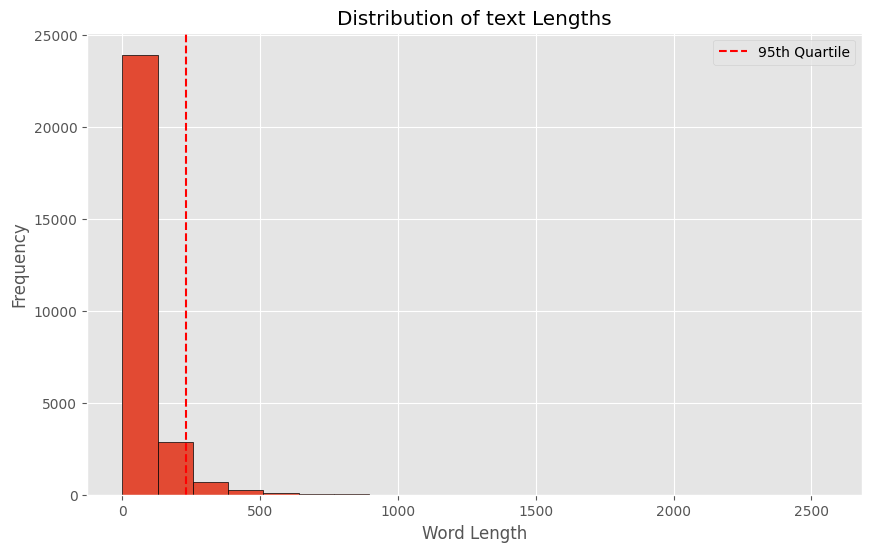

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [39]:
max_text_length = max(text_lengths)
print(f"Maximum Text Length: {max_text_length}")

Maximum Text Length: 2556


In [42]:
#!pip install peft

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 1.6 MB/s eta 0:00:0000:0100:01


In [43]:
#!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 711.7 kB/s eta 0:00:00a 0:00:01


In [44]:
from datasets import load_dataset, DatasetDict, Dataset

from transformers import (
    AutoTokenizer,
    AutoConfig, 
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer)

from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import evaluate
import torch
import numpy as np

In [45]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split


In [46]:
import pandas as pd

# Step 1: Load your dataset
# Replace 'your_dataset.csv' with the path to your actual dataset


# Step 2: Shuffle the dataset
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Step 3: Save the randomized dataset (optional)
# Replace 'randomized_dataset.csv' with your desired output file name
df_shuffled.to_csv('randomized_dataset.csv', index=False)

# Display the first few rows of the shuffled dataset
print(df_shuffled.head())


   label  \
0      0   
1      1   
2      1   
3      0   
4      0   

                                                                                                                                                                                                     text3  \
0                                                                                                                           groovy song httpsopenspotifycomtrackgbktqzdknlmrscqhfctsijzzcuyeftkohxondajucw   
1  thinkeri feel like might petty others keep thinking life late amazing gf back broke mutual term going alot text broke still friend kind added depression job well fun went hell feel tho friend fami...   
2  really wan na dieive mildly depressed year now past month terrible everyday want nothing death young im dont care ahead many people say thing stopping ending life fact dont want brother mom find b...   
3                                                                     wan na cuddle uwu like baggy paja

In [47]:
dataset = df_shuffled
dataset.head(20)

,label,text3,text_length
0,0,groovy song httpsopenspotifycomtrackgbktqzdknlmrscqhfctsijzzcuyeftkohxondajucw,3
1,1,thinkeri feel like might petty others keep thinking life late amazing gf back broke mutual term going alot text broke still friend kind added depression job well fun went hell feel tho friend fami...,61
2,1,really wan na dieive mildly depressed year now past month terrible everyday want nothing death young im dont care ahead many people say thing stopping ending life fact dont want brother mom find b...,40
3,0,wan na cuddle uwu like baggy pajama ac temperature make u cold also warm lay thicc blanket thicc enough make u sweat fall asleep uwu,25
4,0,homophobe tldr unironically spewing homophobic shit mouth make look gay ever heard internalized homophobia basically gay want accept begin dislike probably go level denial usually lash others also...,100
5,1,dont know anymoreall want kill faith god doesnt help make feel ungrateful god dont know think fine minute even hour im back wanting die cant stand person like living planet im much pussy actually ...,58
6,1,tried kill last nighti sitting patio imagining walking intersection see sudden compulsion walk standing sidewalk watching car pas almost daring walk front one also getting frustrated none going fa...,52
7,0,exsitance meme theory element culture system behaviour passed one individual another imitation nongenetic mean image video piece text etc typically humorous nature copied spread rapidly internet u...,238
8,1,really really need help badly pleasemy friend tried commit redflag failed girlfriend left he suicidal love kid want kill destroy reason suicidal thought feel alone cant get job dropped high school...,68
9,0,happy scared math final make board game math question,9


In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

In [49]:
label = dataset['label']
text = dataset['text3']

In [50]:
# Split the data into 70% train and 30% validation/test
train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(text, label, test_size=0.3, random_state=42)

# Further split the 30% into 50% validation and 50% test
val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels, test_size=0.5, random_state=42)

In [52]:
#!pip install datasets

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [53]:
# Create Dataset objects
from datasets import Dataset
train_dataset = Dataset.from_dict({'label': train_labels, 'text': train_texts})
val_dataset = Dataset.from_dict({'label': val_labels, 'text': val_texts})
test_dataset = Dataset.from_dict({'label': test_labels, 'text': test_texts})

In [54]:


# Create DatasetDict containing training, validation, and testing datasets
dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset, 'test': test_dataset})


In [55]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 19510
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 4181
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 4181
    })
})

In [56]:
# display % of training data with label=1
np.array(dataset['train']['label']).sum()/len(dataset['train']['label'])

0.49712967708867245

In [57]:
model_checkpoint = 'google-bert/bert-base-uncased'
id2label = {0:"Negative" , 1:"Positive"}
label2id = {"Negative":0 , "Positive":1}

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint , num_labels = 2 , id2label = id2label , label2id = label2id)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [59]:
# create tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

# add pad token if none exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [60]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["text"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=512
    )

    return tokenized_inputs

In [61]:
# tokenize training and validation datasets
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/19510 [00:00<?, ? examples/s]

Map:   0%|          | 0/4181 [00:00<?, ? examples/s]

Map:   0%|          | 0/4181 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 19510
    })
    validation: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4181
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4181
    })
})

In [62]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [63]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

In [64]:
# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

In [65]:
# define list of examples
text_list = ["I am not happy", "life is so borring.", "today was the best day of my life i really loved it", "i passed my exam. I am very happy", "This life is great"]


In [66]:
# define list of examples
text_list = ["I am so depressed.", "life is so borring.", "today was the best day of my life i really loved it", "i passed my exam. I am very happy", "This life is great"]

print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    # tokenize text
    inputs = tokenizer.encode(text, return_tensors="pt")
    # compute logits
    logits = model(inputs).logits
    # convert logits to label
    predictions = torch.argmax(logits)

    print(text + " - " + id2label[predictions.tolist()])

Untrained model predictions:
----------------------------
I am so depressed. - Positive
life is so borring. - Positive
today was the best day of my life i really loved it - Positive
i passed my exam. I am very happy - Positive
This life is great - Positive


In [74]:
peft_config = LoraConfig(task_type="SEQ_CLS",
                        r=4,
                        lora_alpha=32,
                        lora_dropout=0.01,
                        target_modules = ['bert.encoder.layer.0.attention.self.query',
    'bert.encoder.layer.0.attention.self.key',
    'bert.encoder.layer.0.attention.self.value',
    'bert.encoder.layer.0.attention.output.dense',
    'bert.encoder.layer.0.intermediate.dense',
    'bert.encoder.layer.0.output.dense',
    'bert.encoder.layer.1.attention.self.query',
    'bert.encoder.layer.1.attention.self.key',
    'bert.encoder.layer.1.attention.self.value',
    'bert.encoder.layer.1.attention.output.dense',
    'bert.encoder.layer.1.intermediate.dense',
    'bert.encoder.layer.1.output.dense',
    'bert.encoder.layer.2.attention.self.query',
    'bert.encoder.layer.2.attention.self.key',
    'bert.encoder.layer.2.attention.self.value',
    'bert.encoder.layer.2.attention.output.dense',
    'bert.encoder.layer.2.intermediate.dense',
    'bert.encoder.layer.2.output.dense',
    'bert.encoder.layer.3.attention.self.query',
    'bert.encoder.layer.3.attention.self.key',
    'bert.encoder.layer.3.attention.self.value',
    'bert.encoder.layer.3.attention.output.dense',
    'bert.encoder.layer.3.intermediate.dense',
    'bert.encoder.layer.3.output.dense',
    'bert.encoder.layer.4.attention.self.query',
    'bert.encoder.layer.4.attention.self.key',
    'bert.encoder.layer.4.attention.self.value',
    'bert.encoder.layer.4.attention.output.dense',
    'bert.encoder.layer.4.intermediate.dense',
    'bert.encoder.layer.4.output.dense',
    'bert.encoder.layer.5.attention.self.query',
    'bert.encoder.layer.5.attention.self.key',
    'bert.encoder.layer.5.attention.self.value',
    'bert.encoder.layer.5.attention.output.dense',
    'bert.encoder.layer.5.intermediate.dense',
    'bert.encoder.layer.5.output.dense',
    'bert.encoder.layer.6.attention.self.query',
    'bert.encoder.layer.6.attention.self.key',
    'bert.encoder.layer.6.attention.self.value',
    'bert.encoder.layer.6.attention.output.dense',
    'bert.encoder.layer.6.intermediate.dense',
    'bert.encoder.layer.6.output.dense',
    'bert.encoder.layer.7.attention.self.query',
    'bert.encoder.layer.7.attention.self.key',
    'bert.encoder.layer.7.attention.self.value',
    'bert.encoder.layer.7.attention.output.dense',
    'bert.encoder.layer.7.intermediate.dense',
    'bert.encoder.layer.7.output.dense',
    'bert.encoder.layer.8.attention.self.query',
    'bert.encoder.layer.8.attention.self.key',
    'bert.encoder.layer.8.attention.self.value',
    'bert.encoder.layer.8.attention.output.dense',
    'bert.encoder.layer.8.intermediate.dense',
    'bert.encoder.layer.8.output.dense',
    'bert.encoder.layer.9.attention.self.query',
    'bert.encoder.layer.9.attention.self.key',
    'bert.encoder.layer.9.attention.self.value',
    'bert.encoder.layer.9.attention.output.dense',
    'bert.encoder.layer.9.intermediate.dense',
    'bert.encoder.layer.9.output.dense',
    'bert.encoder.layer.10.attention.self.query',
    'bert.encoder.layer.10.attention.self.key',
    'bert.encoder.layer.10.attention.self.value',
    'bert.encoder.layer.10.attention.output.dense',
    'bert.encoder.layer.10.intermediate.dense',
    'bert.encoder.layer.10.output.dense',
])

In [68]:
peft_config

LoraConfig(peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, task_type='SEQ_CLS', inference_mode=False, r=4, target_modules={'bert.encoder.layer.5.output.dense', 'bert.encoder.layer.6.output.dense', 'bert.encoder.layer.0.attention.output.dense', 'bert.encoder.layer.11.attention.output.dense', 'bert.encoder.layer.1.attention.self.query', 'bert.encoder.layer.2.attention.self.query', 'bert.encoder.layer.2.attention.self.key', 'bert.encoder.layer.1.attention.self.key', 'bert.encoder.layer.2.attention.output.dense', 'bert.encoder.layer.2.output.dense', 'bert.encoder.layer.7.attention.self.key', 'bert.encoder.layer.7.output.dense', 'bert.encoder.layer.9.attention.output.dense', 'bert.encoder.layer.0.output.dense', 'bert.encoder.layer.5.intermediate.dense', 'bert.encoder.layer.7.intermediate.dense', 'bert.encoder.layer.3.attention.output.dense', 'bert.encoder.layer.10.attention.output.dense', 'bert.encoder.layer.4.intermediate.dense', 'bert.enc

In [ ]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

In [75]:
# hyperparameters
lr = 1e-5
batch_size = 32
num_epochs = 10

In [71]:
# define training arguments
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
# creater trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator, # this will dynamically pad examples in each batch to be equal length
    compute_metrics=compute_metrics,
)

# train model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.708300,0.693402,{'accuracy': 0.49007414494140156}


Trainer is attempting to log a value of "{'accuracy': 0.49007414494140156}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
